### 합성곱 신경망의 구성 요소

#### 합성곱 : 입력 데이터에서 유용한 특성만 드러나게 하는 것

ex) 뉴런이 3개의 가중치를 가짐, 10개의 입력 데이터
1. 가중치 $w_1, w_2, w_3$이 입력의 처음 3개 특성과 곱해져 1개의 출력을 만듦
2. 이 뉴런이 한 칸 아래로 이동해 두 번째부터 네번째 특성과 곱해져 새로운 출력을 만듦(같은 가중치 $w_1, w_2, w_3$ 사용)
3. 입력데이터가 10개이므로 총 8개의 출력이 만들어짐

<table><tr><td><img src='../image/합성곱1.jpg'>
</td><td><img src='../image/합성곱2.jpg'></td></tr><tr><td><img src='../image/합성곱3.jpg'></td><td><img src='../image/합성곱4.jpg'></td></tr></table>

-> 이전의 신경망은 뉴런이 길게 늘어서 있고 서로 조밀하게 연결되어 있음, but, 합성곱에서는 뉴런이 입력 위를 이동하면서 출력을 만듦(뉴런이라 부르기 어색함)<br/>
=> <strong>합성곱 신경망 : 뉴런을 필터(커널)라고 함</strong>

##### 특성맵
![](../image/특성맵.jpg)

#### 케라스 합성곱 층

입력 위를(왼쪽에서 오른쪽으로, 위에서 아래로) 이동하는 합성곱은 Conv2D 클래스<br>
<code>from tensorflow import keras<br/>kerays.layers.Conv2D(10, kernel_size=(3,3), activation='relu')</code> # 필터개수, 커널 크기, 활성화 함수

##### 패딩 : 배열의 주위를 가상 원소로 채우는 것
why? : 패딩이 없으면 중앙부와 모서리 픽셀이 합성곱에 참여하는 비율이 크게 차이 남<br>
![](../image/패딩.png)
- 세임 패딩 : 입력의 크기와 출력의 크기를 같게 하게 위해 입력 주위에 0으로 패딩<br>
<code>kerays.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')</code>
- 밸리드 패딩 : 패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우(특성 맵의 크기가 줄어듦)

##### 스트라이드 : 좌우, 위 아래로 여러 칸씩 이동
<code>keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)</code>

##### 플링 : 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할(특성맵의 개수는 줄어들지 않음)
![](../image/풀링.jpg)
- 최대 풀링 : 도장을 찍은 영역에서 가장 큰 값을 고름<br/><code>keras.layers.MaxPooling2D(2, strides=2, padding='valid')</code>
- 평균 풀링 : 도장을 찍은 영역에서 평균값을 계산
- 스트라이딩 : 겹치지 않고 슬라이딩 함

#### 합성곱 신경망(CNN)의 전체 구조
![](../image/합성곱%20신경망%20전체%20구조.jpg)

##### 컬러 이미지를 사용한 합성곱
![](../image/3차원%20합성곱.jpg)

### 합성곱 신경망을 사용한 이미지 분류

#### 패션 MNIST 데이터 불러오기

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

#### 합성곱 신경망 만들기

In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1))) # 32개의 필터, 커널의 크기는 (3,3), 렐루 활성화 함수, 세임 패딩 사용

c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.add(keras.layers.MaxPooling2D(2)) # 28 * 28에 세임 패딩을 적용했기 때문에 출력 특성 맵의 가로세로 크기는 입력과 동일, (2,2) 풀링을 적용했으므로 특성 맵의 크기는 절반으로 줄어듦
# 합성곱 층에서 32개의 필터를 사용 -> 특성 맵의 깊이는 32
# -> 출력 특성맵의 크기는 (14, 14, 32)

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same')) # 64개의 필터, 커널의 크기는 (3,3), 렐루 활성화 함수, 세임 패딩 사용
model.add(keras.layers.MaxPooling2D(2)) # 14 * 14에 세임 패딩을 적용했기 때문에 출력 특성 맵의 가로세로 크기는 입력과 동일, (2,2) 풀링을 적용했으므로 특성 맵의 크기는 절반으로 줄어듦
# 합성곱 층에서 64개의 필터를 사용 -> 특성 맵의 깊이는 64
# -> 출력 특성 맵의 크기는 (7,7,64)

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
%pip install --upgrade tensorflow keras

Note: you may need to restart the kernel to use updated packages.


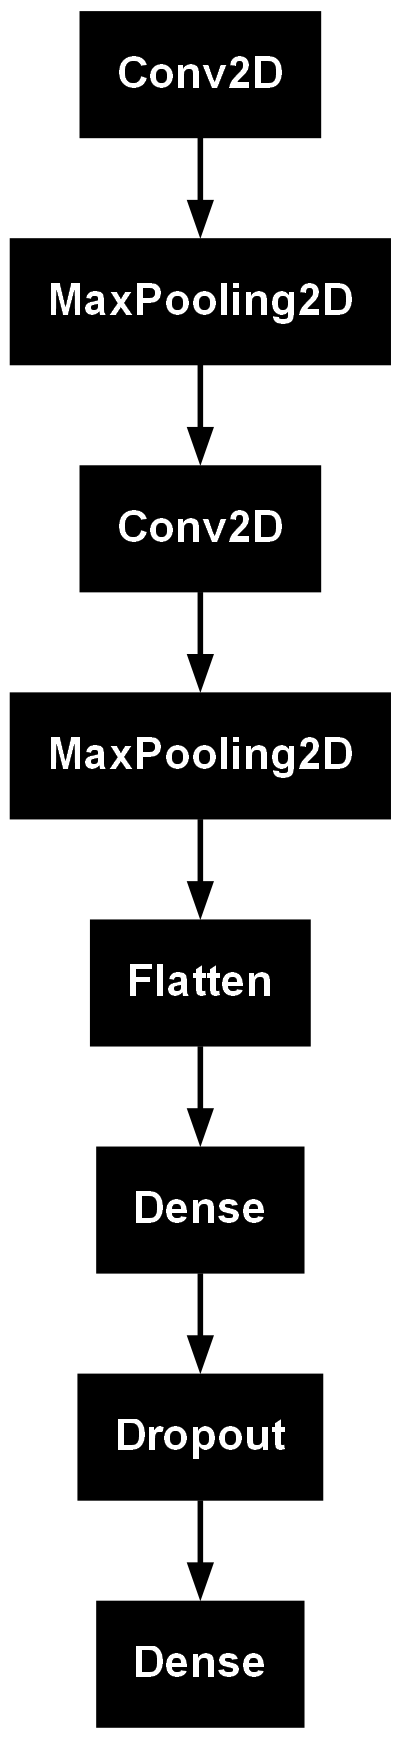

In [8]:
keras.utils.plot_model(model)

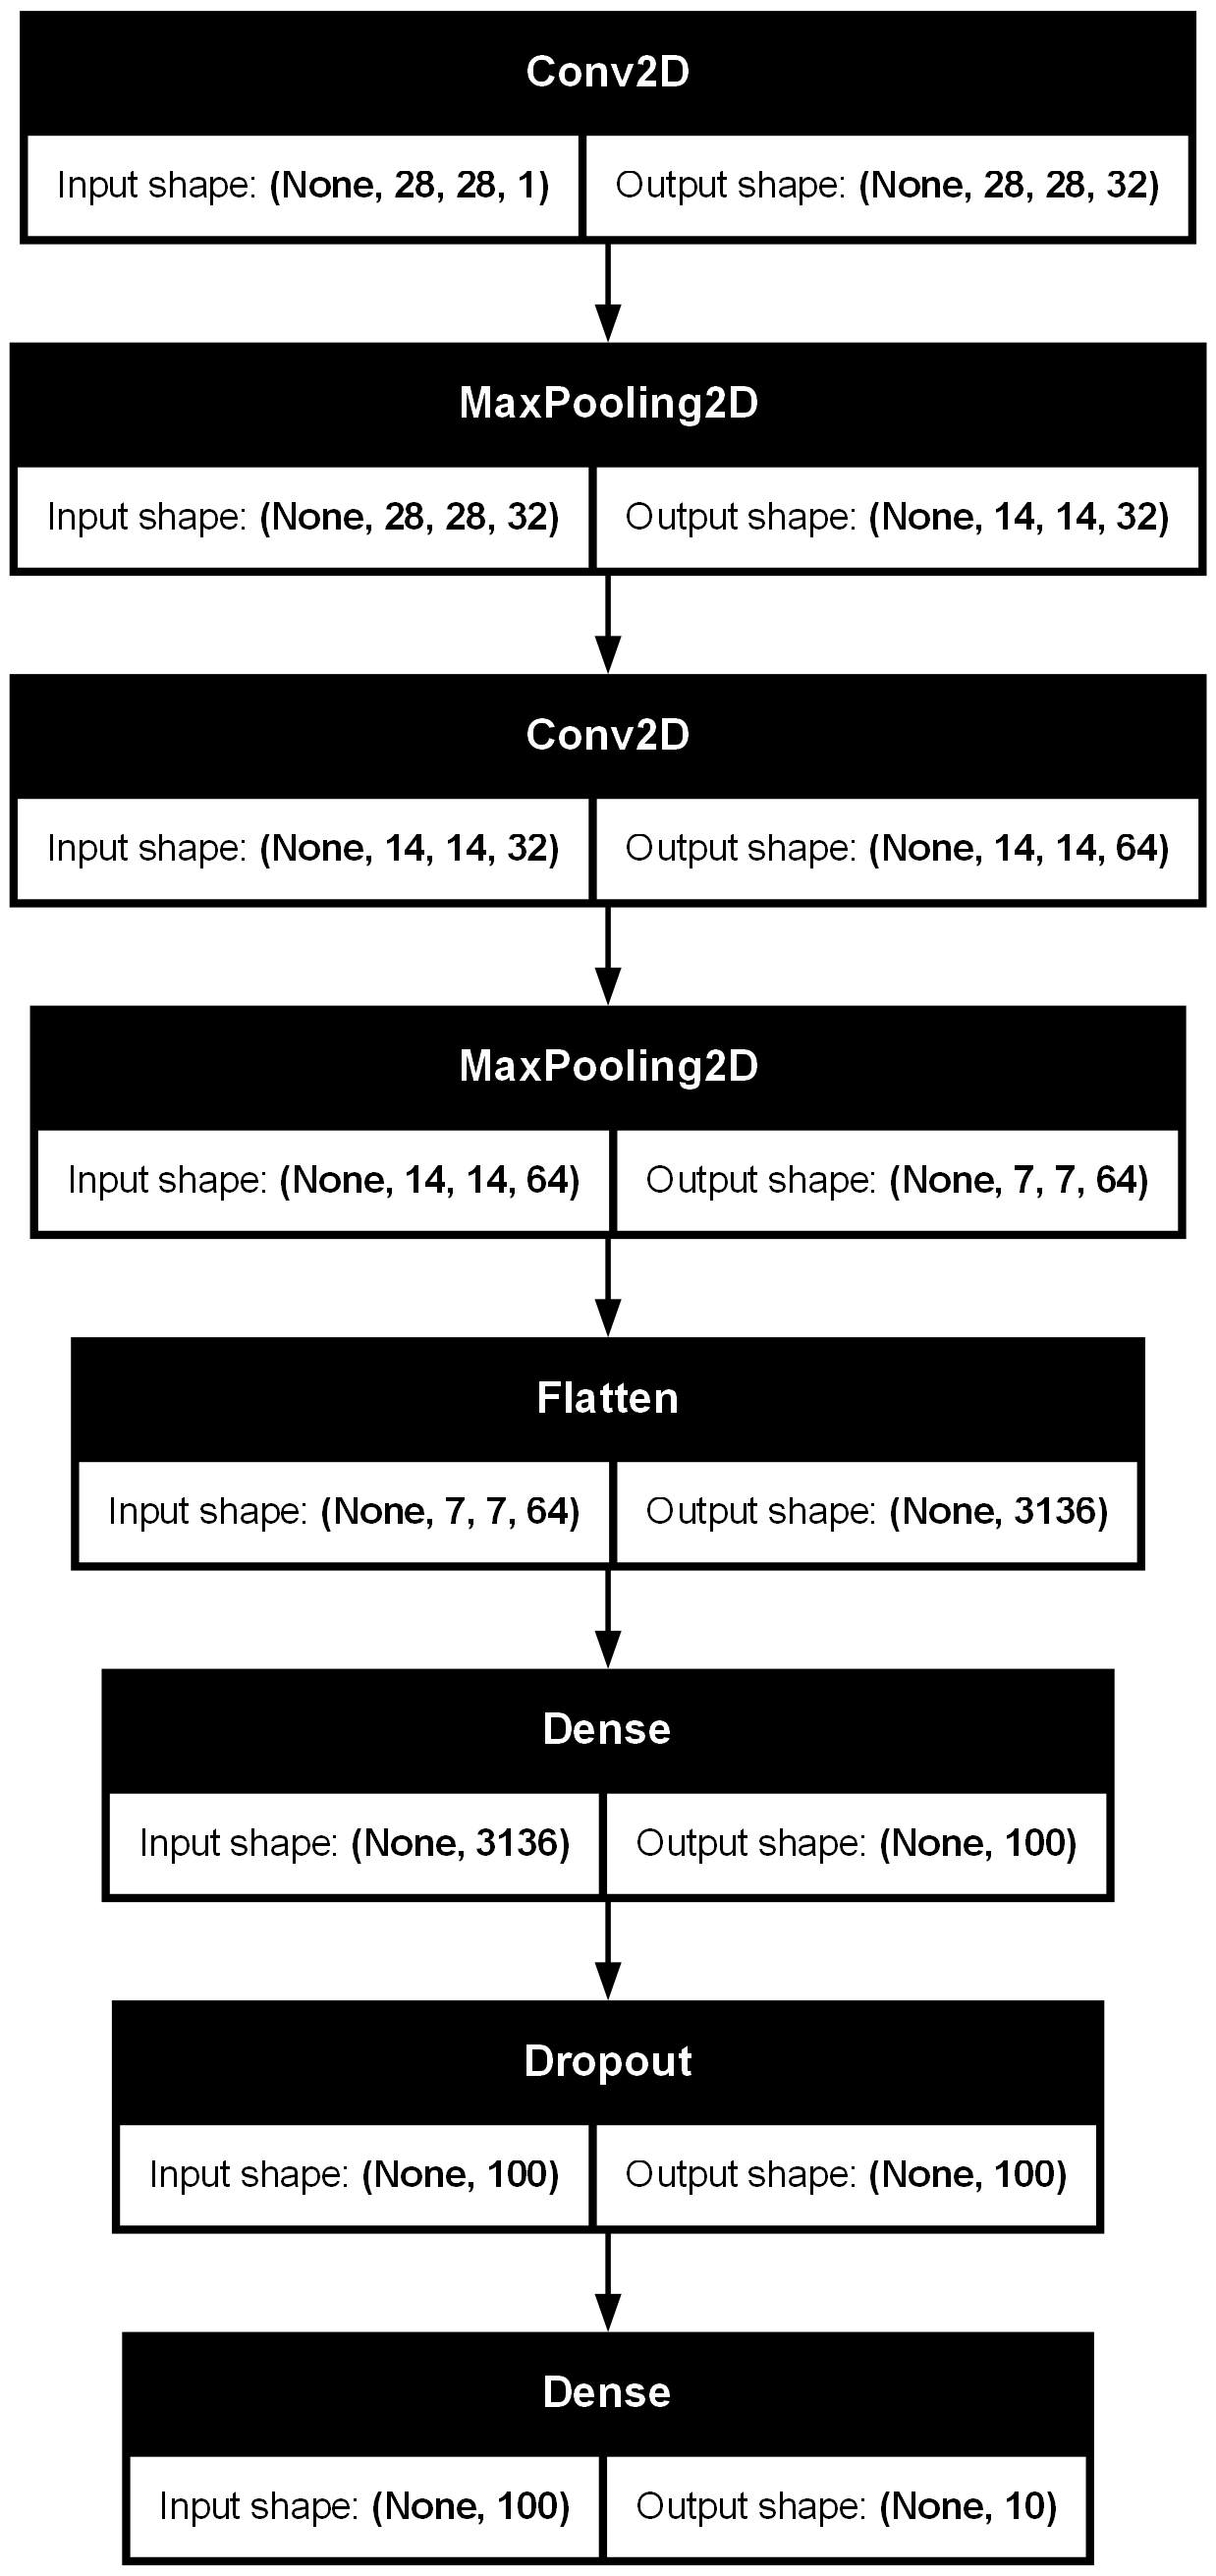

In [9]:
keras.utils.plot_model(model, show_shapes=True)

![](../image/합성곱%20모델%20요약.jpg)

#### 모델 컴파일과 훈련

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7502 - loss: 0.6971 - val_accuracy: 0.8821 - val_loss: 0.3212
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8768 - loss: 0.3441 - val_accuracy: 0.8957 - val_loss: 0.2740
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8940 - loss: 0.2885 - val_accuracy: 0.9063 - val_loss: 0.2494
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9099 - loss: 0.2517 - val_accuracy: 0.9057 - val_loss: 0.2460
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9129 - loss: 0.2316 - val_accuracy: 0.9191 - val_loss: 0.2195
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9233 - loss: 0.2094 - val_accuracy: 0.9162 - val_loss: 0.2337
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9285 - loss: 0.1938 - val_accuracy: 0.9172 - val_loss: 0.2298


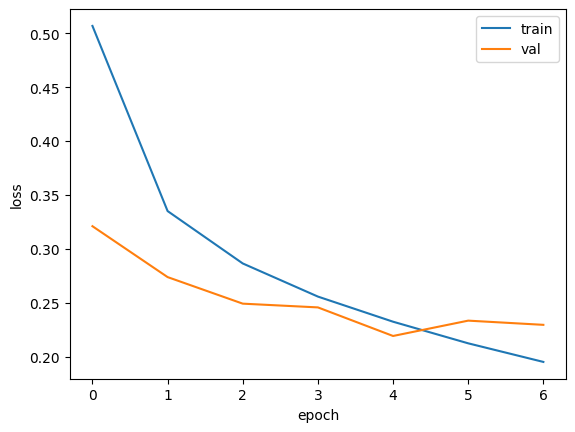

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [12]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9218 - loss: 0.2106


[0.21948687732219696, 0.9190833568572998]

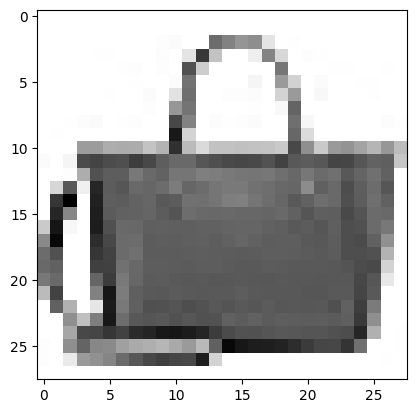

In [13]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [14]:
preds = model.predict(val_scaled[0:1])
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[1.8704649e-14, 3.5217648e-20, 2.3393922e-16, 1.6480737e-15,
        2.5744204e-13, 1.9877212e-15, 7.4730742e-12, 2.2246409e-14,
        1.0000000e+00, 2.9533599e-14]], dtype=float32)

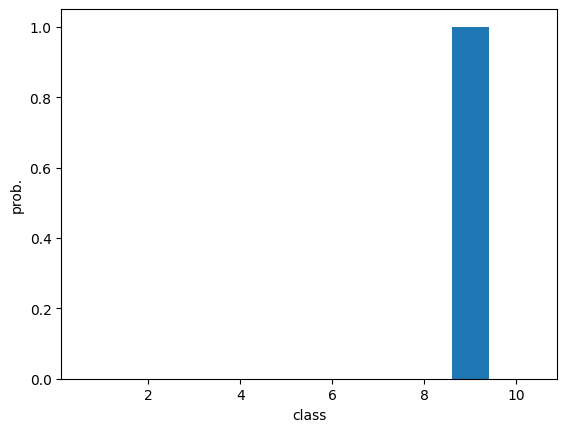

In [15]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [16]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [17]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [18]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9105 - loss: 0.2515


[0.24512138962745667, 0.9125999808311462]

### 합성곱 신경망의 시각화

#### 가중치 시각화

합성곱 층은 여러 개의 필터를 사용해 이미지에서 특징을 학습
각 필터는 커널이라 부르는 가중치와 절편을 가짐(일반적으로 절편은 시각적으로 의미가 있지 않음)

In [20]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.keras')

model.layers
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)
# 커널의 크기: 3, 입력의 깊이가 1 -> 실제 커널의 크기는 (3,3,1), 필터 개수가 32개 => (3,3,1,32)
# 절편의 개수, 필터마다 1개의 절편이 있으므로 (32, )

(3, 3, 1, 32) (32,)


In [21]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std()) # 가중치의 평균은 0에 가깝고 표준편차는 0.24

-0.036471136 0.24532685


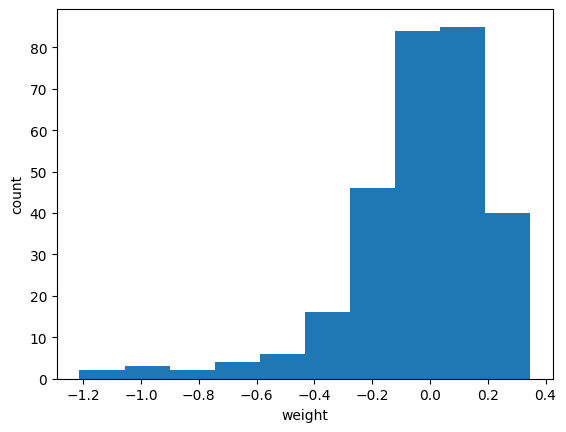

In [22]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

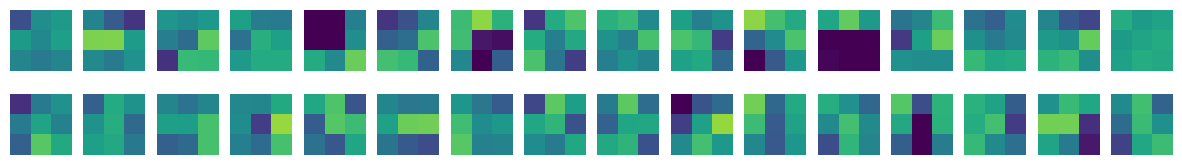

In [24]:
fig, axs = plt.subplots(2,16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
plt.show() # 훈련한 가중치를 보여줌줌

#### 함수형 API : 입력, 출력이 여러 개인 경우 사용

In [25]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

In [28]:
inputs = keras.Input(shape=(784,))

In [29]:
hidden = dense1(inputs)
outputs = dense2(hidden)

In [30]:
model = keras.Model(inputs, outputs)

In [31]:
model.summary()

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
print(model.inputs)

[<KerasTensor shape=(None, 784), dtype=float32, sparse=False, name=keras_tensor_109>]


In [35]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)

#### 특성 맵 시각화

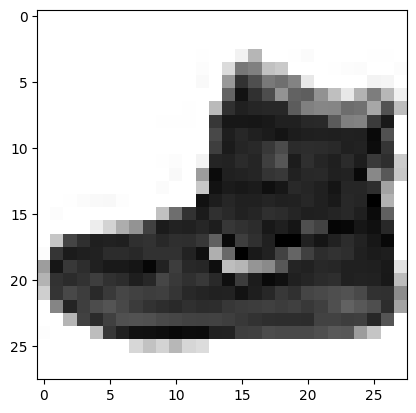

In [36]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [37]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(inputs)

ValueError: Input 0 of layer "functional_25" is incompatible with the layer: expected shape=(None, 784), found shape=(1, 28, 28)